In [1]:
#This section is importing all libraries & data used for the project

#importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Used a new conda environment to install h2o module as not compatible with current python version
#Also installed a Java.jdk module needed to initialise h2o model
#Importing h2o package, it is a robust platform that allows for data loading, processing, visualization, feature engineering, model building and tuning.
import h2o

# Exploratory Analysis

In [2]:
h2o.init()# initialising module in order to load data

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,1 day 7 hours 36 mins
H2O cluster timezone:,Europe/London
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.1
H2O cluster version age:,"21 days, 3 hours and 35 minutes"
H2O cluster name:,H2O_from_python_collinbatte_eybqiq
H2O cluster total nodes:,1
H2O cluster free memory:,1.537 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [3]:
training_data = h2o.import_file('./DataFiles/CreditCard_train.csv') # Imports the dataset into h2o frame. This dataset will be used for final EDA.
data = training_data[range(2,24002),:] # removes first 2 rows as they aren't needed for analysis

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
data.describe() # Generates an in-depth description of this H2OFrame

Rows:24000
Cols:25




,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,1.0,10000.0,1.0,0.0,0.0,21.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,12000.5,165495.9866666667,1.62825,1.8474166666666667,1.5572499999999998,35.38045833333335,-0.0031249999999999763,-0.1235,-0.15474999999999992,-0.21166666666666667,-0.2529166666666666,-0.2780000000000001,50596.88470833332,48646.06412499999,46367.057625,42368.18841666668,40000.68254166665,38563.71062500001,5542.912916666665,5815.336208333336,4969.265999999999,4743.480041666668,4783.486041666669,5189.399041666667,0.22375
maxs,24000.0,1000000.0,2.0,6.0,3.0,79.0,8.0,8.0,8.0,8.0,8.0,8.0,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0,505000.0,1684259.0,896040.0,497000.0,417990.0,528666.0,1.0
sigma,6928.347566339322,129128.74485511602,0.483282183859718,0.7800066304119051,0.5220796182547176,9.27105034352636,1.1234253370363911,1.2005795022811083,1.2040332947392351,1.166549294761235,1.136993267845513,1.1581689095871541,72649.37425640585,70364.60043612923,68193.89832061023,63070.68093365352,60345.01276555432,59155.759799066574,15068.576072056978,20797.03192254137,16095.61433976508,14883.269989983766,15270.405278504528,17630.371990117277,0.41676513135771465
zeros,0,0,0,11,41,0,11739,12543,12577,13251,13520,12877,1607,2049,2325,2547,2840,3258,4270,4362,4853,5200,5407,5846,18630
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0


<Figure size 432x288 with 0 Axes>

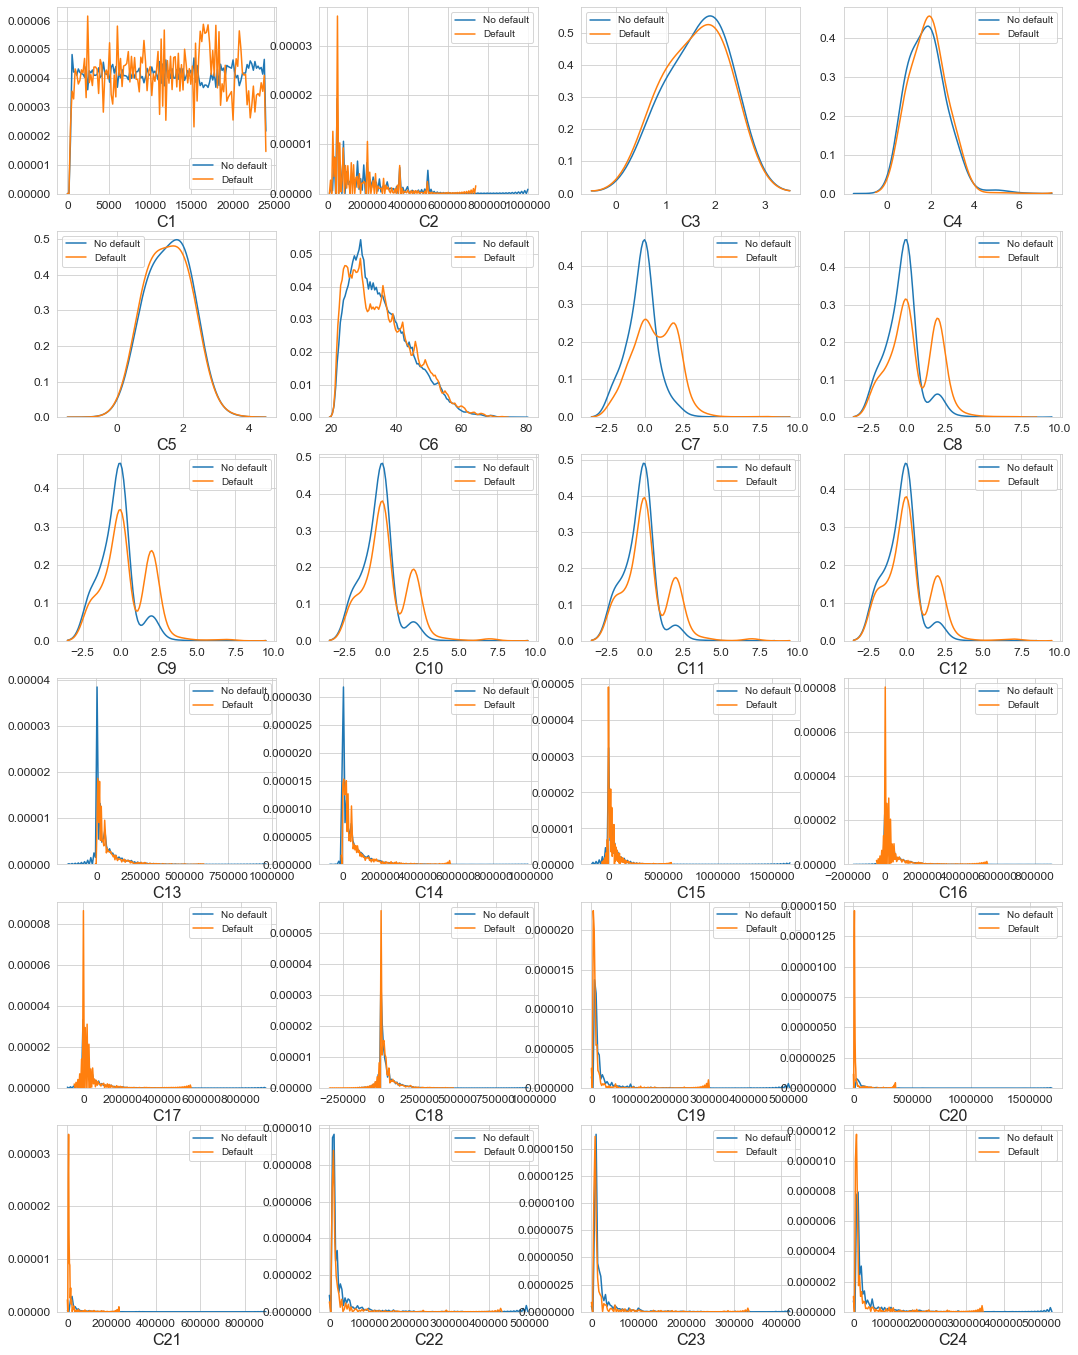

In [5]:
attributes = [a for a in data.columns if a not in ['C25']] # Retrieves the column names from the dataset
i = 0
x0 = data[data['C25'] == 0].as_data_frame() # Obtains the dataset as a python-local object so can manipulate now using panda and seaborn
x1 = data[data['C25'] == 1].as_data_frame()
sns.set_style('whitegrid') # Sets the aesthetic style of the plots.
plt.figure() # Creates a new figure
fig, ax = plt.subplots(6,4,figsize=(18,24)) # Adds a subplot to the current figure
for attribute in attributes: # Loop to obtain multiple plots
    i += 1
    plt.subplot(6,4,i)
    sns.kdeplot(x0[attribute], bw=0.5,label="No default") # Fits and plots a kernel density estimate
    sns.kdeplot(x1[attribute], bw=0.5,label="Default")
    plt.xlabel(attribute, fontsize=16) # Determines x label
    locs, labels = plt.xticks() #Sets the current tick locations and labels of the x-axis
    plt.tick_params(axis='both', which='major', labelsize=12) # Changes the appearance of ticks
plt.show();

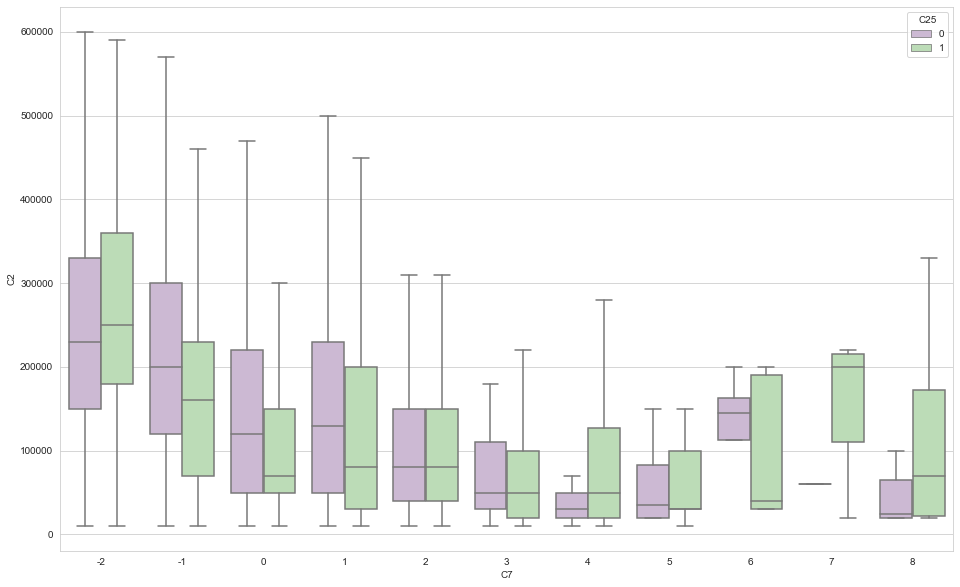

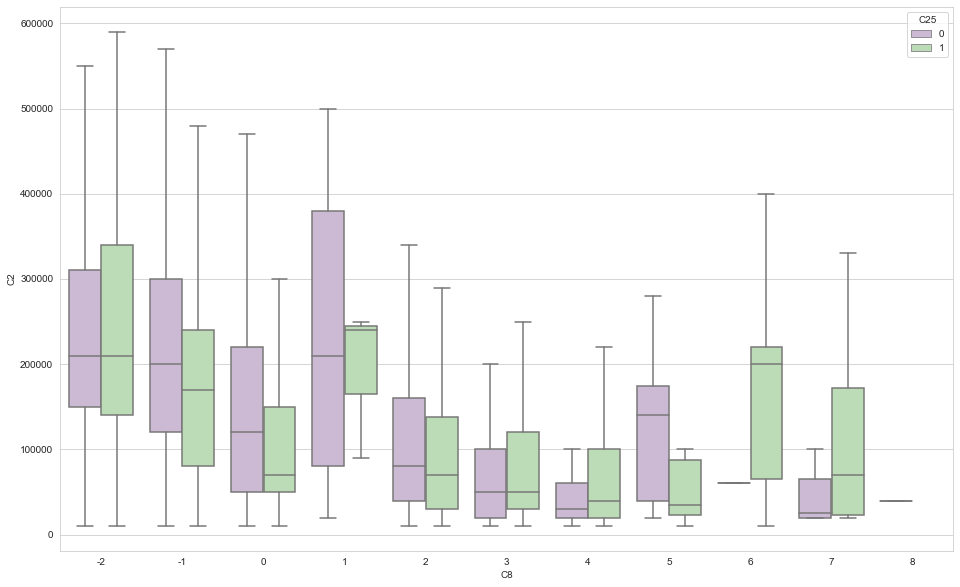

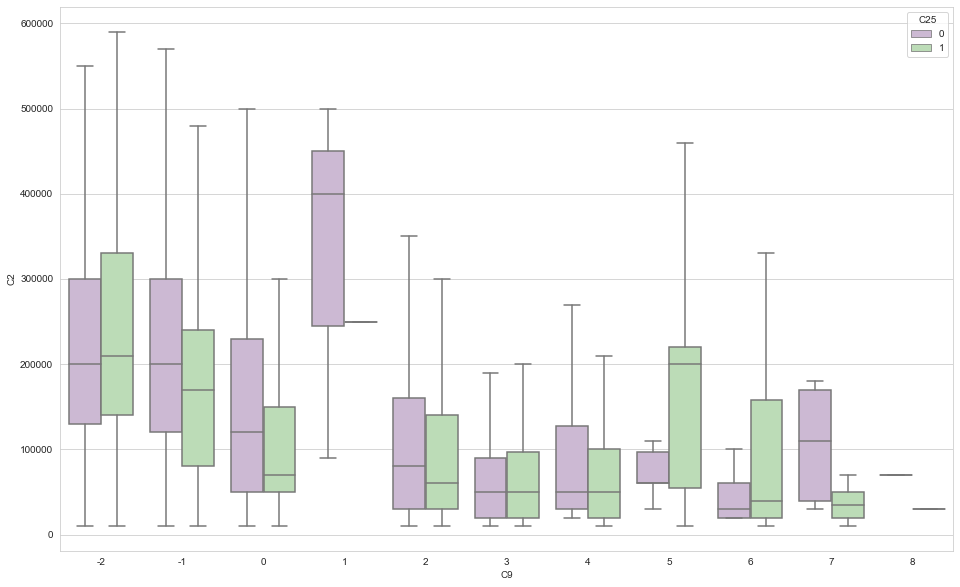

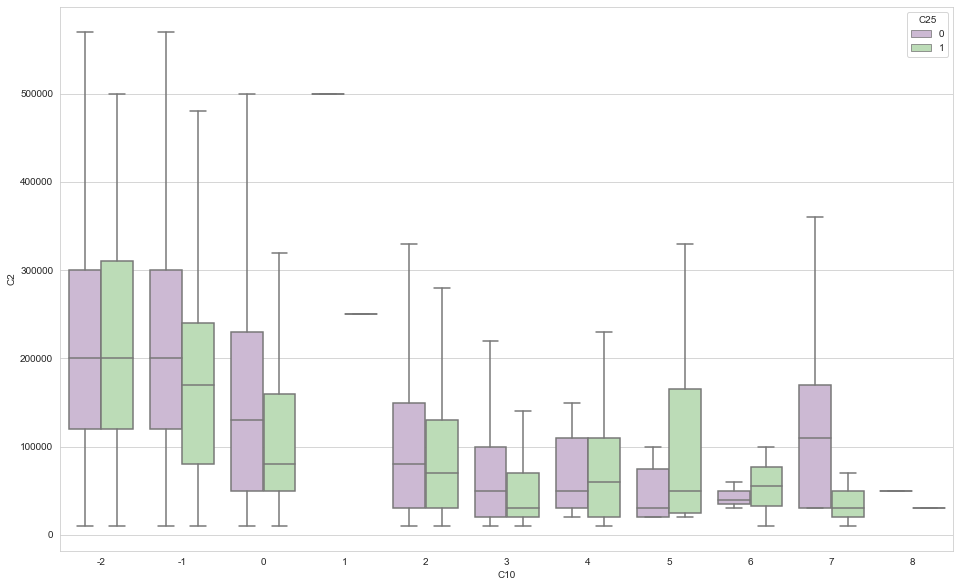

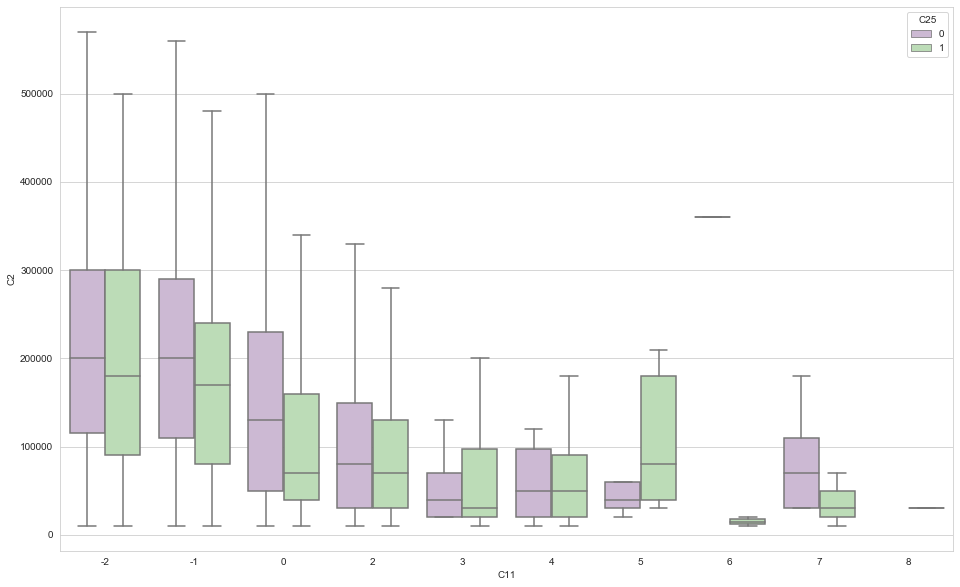

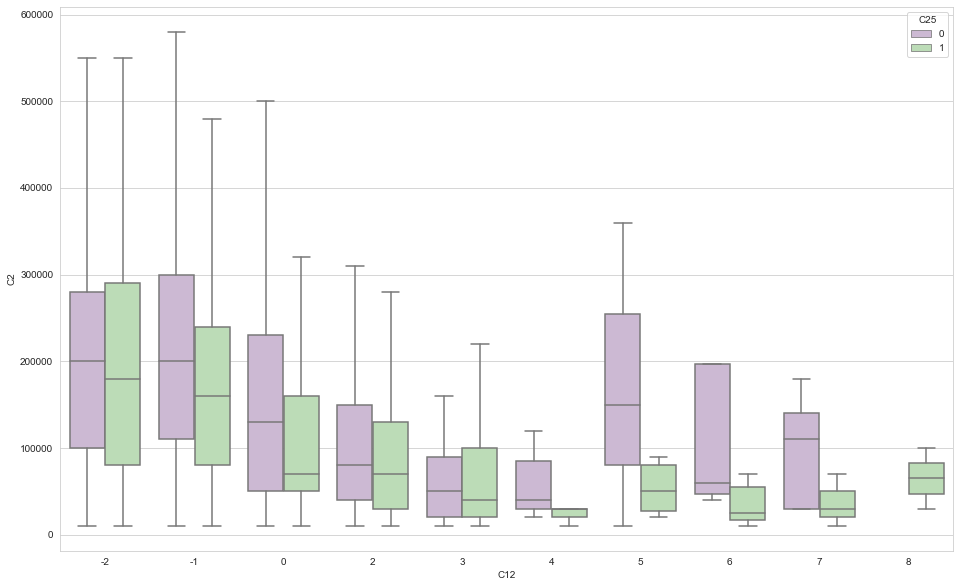

In [6]:
d = data.as_data_frame()
variance = ['C7','C8', 'C9', 'C10', 'C11','C12']
for v in variance: # loop to allow plotting of multiple graphs
    fig, ax = plt.subplots(ncols=1, figsize=(16,10)) # Adds a subplot to the current figure
    s = sns.boxplot(ax = ax, x=v, y="C2", hue="C25",data=d, palette="PRGn",showfliers=False) # Creates a boxplot
    plt.show();

In [7]:
def boxplot_variation(attribute1, attribute2, attribute3, width=16): # defined a function allowing to create a variety of boxplots
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6)) # Adds a subplot to the current figure
    s = sns.boxplot(ax = ax1, x=attribute1, y=attribute2, hue=attribute3, data=d, palette="PRGn",showfliers=False) #Draws a box plot to show distributions with respect to categories.
    s.set_xticklabels(s.get_xticklabels(),rotation=270) # Sets the x-tick labels with list of string labels.
    plt.show();

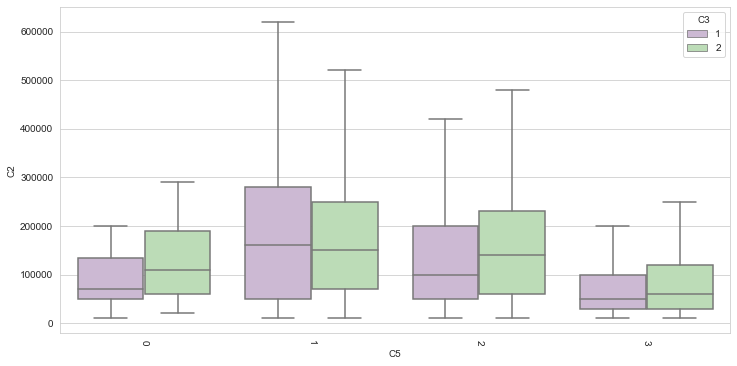

In [8]:
boxplot_variation('C5','C2', 'C3',12)# Creates a boxplot

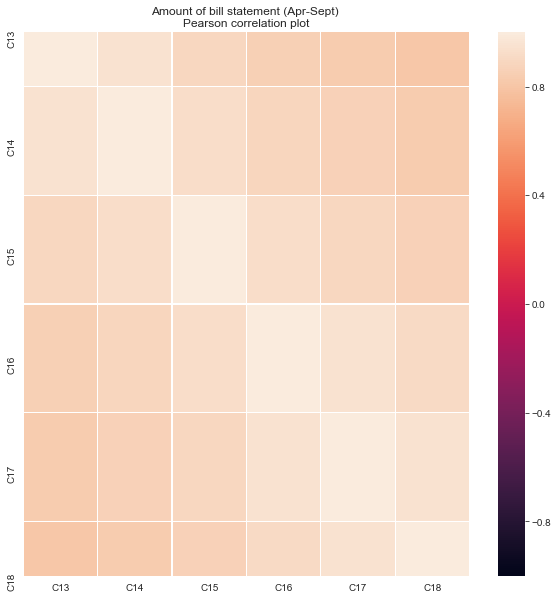

In [9]:
variance = ['C13','C14','C15','C16','C17','C18'] #variables to be compared

plt.figure(figsize = (10,10)) # Creates a new figure
plt.title('Amount of bill statement (Apr-Sept) \nPearson correlation plot') #Set a title for the figure
correlation = data[variance].cor().as_data_frame() # Computes the correlation matrix and then Obtains the dataset as a python-local object so can manipulate now using panda and seaborn
correlation.index = variance
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,linewidths=.1,vmin=-1, vmax=1) # creates matrix figure
plt.show()

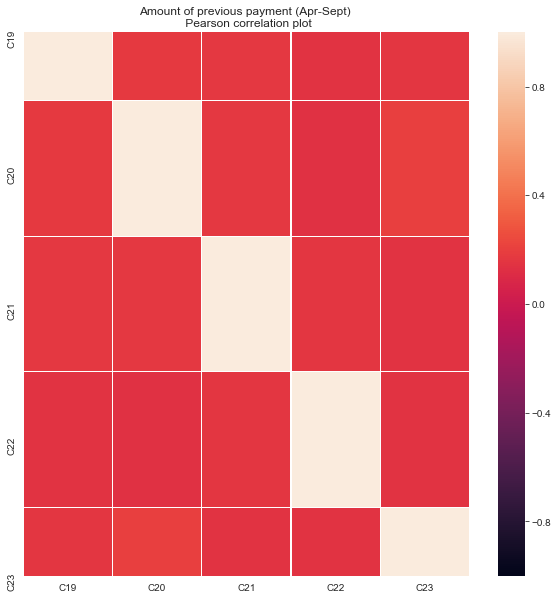

In [10]:
variance = ['C19','C20','C21','C22','C23']

plt.figure(figsize = (10,10))
plt.title('Amount of previous payment (Apr-Sept) \n Pearson correlation plot')
correlation = data[variance].cor().as_data_frame()
correlation.index = variance
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

In [108]:
#This section is importing all libraries & data used for the project

import scipy.stats as stats

#importing the data filecols = [ f for f in data.columns]
data = pd.read_csv("./DataFiles/CreditCard_train.csv", header=1, index_col='ID')
test = pd.read_csv("./DataFiles/CreditCard_test.csv", header=1, index_col='ID')

data['group'] = ['train']*len(data)
test['group'] = ['test']*len(test)
#displaying the first 10 rows of the data
data.head(10)
data = pd.concat([data, test], ignore_index=True)
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,group
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,train
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,train
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,train
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,train
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,train
5,50000,1,1,2,37,0,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,train
6,500000,1,1,2,29,0,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,train
7,100000,2,2,2,23,0,-1,-1,0,0,...,-159,567,380,601,0,581,1687,1542,0,train
8,140000,2,3,1,28,0,0,2,0,0,...,11793,3719,3329,0,432,1000,1000,1000,0,train
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,13007,13912,0,0,0,13007,1122,0,0,train


In [109]:
#displaying the columns of the data file
data.columns


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'group'],
      dtype='object')

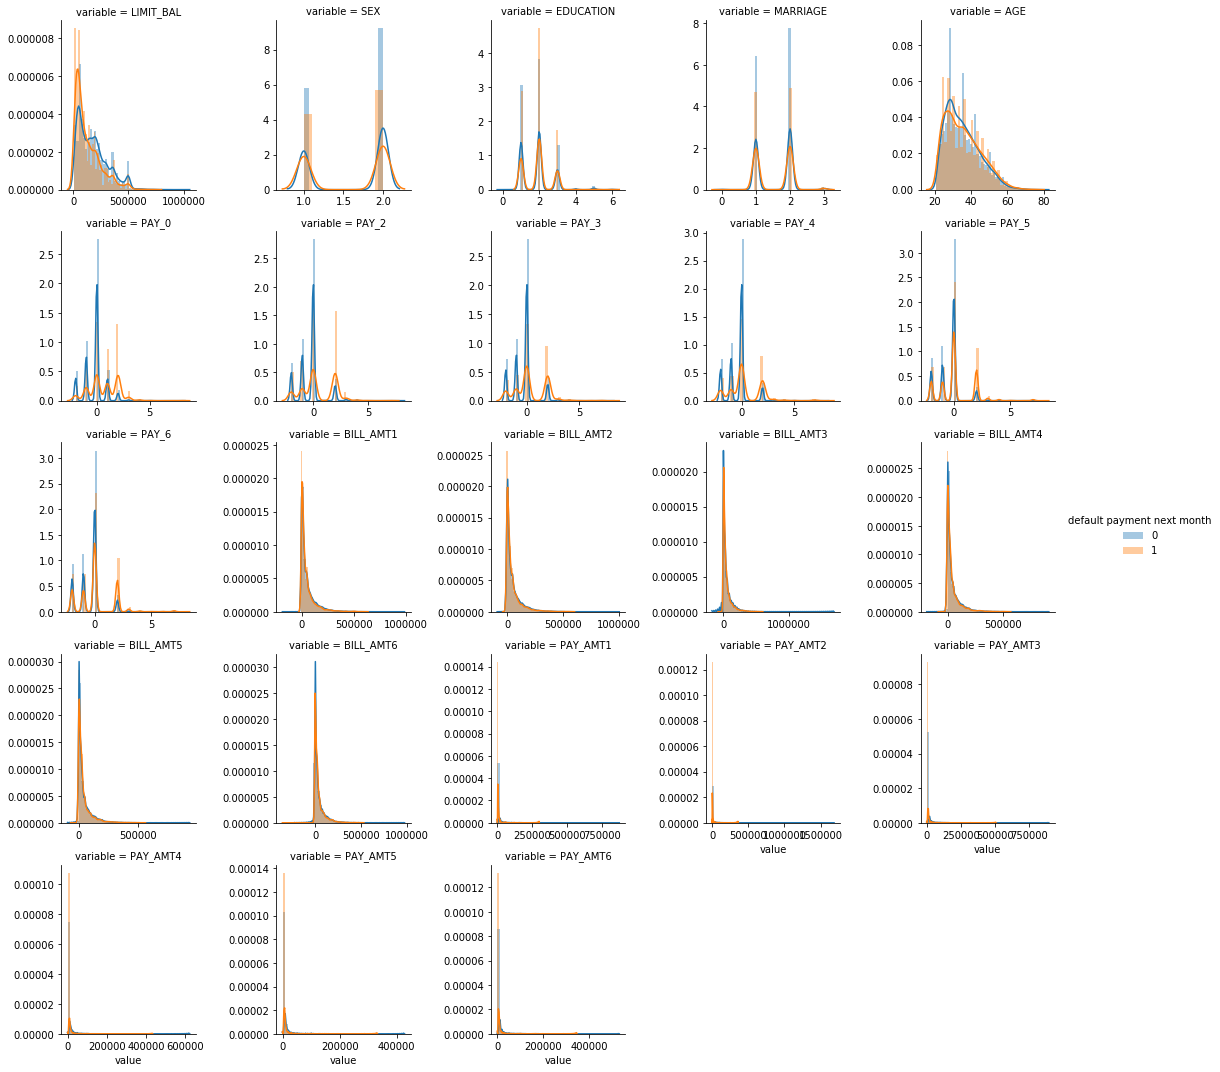

In [110]:
#This section is visualizing & exploring the data

#for simplification
output = 'default payment next month'

#Conducting exploratory data analysis (EDA)
cols = [ f for f in data.columns if data.dtypes[ f ] != "object"]
#Removing irrelevant columns from the data 
cols.remove( output )

f = pd.melt( data, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()


In [111]:
# One-hot encoding for categorical variables
categories = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for element in categories:
    data[element] = data[element].astype('category')
    
for element in categories:
    data = pd.concat((data, pd.get_dummies(data[element], prefix=[element])), axis=1)

data = data.drop(categories, axis=1)

train = data.loc[data['group']=='train',: ]
train = train.drop('group', axis=1)
test = data.loc[data['group']=='test',: ]
test = test.drop('group', axis=1)

In [112]:
#displaying the columns of the data file
print(list(train.columns))
train

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month', "['SEX']_1", "['SEX']_2", "['EDUCATION']_0", "['EDUCATION']_1", "['EDUCATION']_2", "['EDUCATION']_3", "['EDUCATION']_4", "['EDUCATION']_5", "['EDUCATION']_6", "['MARRIAGE']_0", "['MARRIAGE']_1", "['MARRIAGE']_2", "['MARRIAGE']_3", "['PAY_0']_-2", "['PAY_0']_-1", "['PAY_0']_0", "['PAY_0']_1", "['PAY_0']_2", "['PAY_0']_3", "['PAY_0']_4", "['PAY_0']_5", "['PAY_0']_6", "['PAY_0']_7", "['PAY_0']_8", "['PAY_2']_-2", "['PAY_2']_-1", "['PAY_2']_0", "['PAY_2']_1", "['PAY_2']_2", "['PAY_2']_3", "['PAY_2']_4", "['PAY_2']_5", "['PAY_2']_6", "['PAY_2']_7", "['PAY_2']_8", "['PAY_3']_-2", "['PAY_3']_-1", "['PAY_3']_0", "['PAY_3']_1", "['PAY_3']_2", "['PAY_3']_3", "['PAY_3']_4", "['PAY_3']_5", "['PAY_3']_6", "['PAY_3']_7", "['PAY_3']_8", "['PAY_4']_-2", "['PAY_4']_-1", "['PAY_4']_0", "['PAY_4']_1", "['PA

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,['PAY_6']_-2,['PAY_6']_-1,['PAY_6']_0,['PAY_6']_2,['PAY_6']_3,['PAY_6']_4,['PAY_6']_5,['PAY_6']_6,['PAY_6']_7,['PAY_6']_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0
5,50000,37,64400,57069,57608,19394,19619,20024,2500,1815,...,0,0,1,0,0,0,0,0,0,0
6,500000,29,367965,412023,445007,542653,483003,473944,55000,40000,...,0,0,1,0,0,0,0,0,0,0
7,100000,23,11876,380,601,221,-159,567,380,601,...,0,1,0,0,0,0,0,0,0,0
8,140000,28,11285,14096,12108,12211,11793,3719,3329,0,...,0,0,1,0,0,0,0,0,0,0
9,20000,35,0,0,0,0,13007,13912,0,0,...,0,1,0,0,0,0,0,0,0,0


# Standardisation and PCA

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

raw_numerics = [
    'LIMIT_BAL',
    'BILL_AMT1', 
    'BILL_AMT2', 
    'BILL_AMT3', 
    'BILL_AMT4', 
    'BILL_AMT5', 
    'BILL_AMT6', 
    'PAY_AMT1', 
    'PAY_AMT2', 
    'PAY_AMT3', 
    'PAY_AMT4', 
    'PAY_AMT5', 
    'PAY_AMT6'
]

principalColumns = [
    'PC1',
    'PC2',
    'PC3',
    'PC4',
    'PC5',
    'PC6',
    'PC7',
    'PC8'
]

scaler = StandardScaler()
pca = PCA(0.95)

scaler.fit(train.loc[:, raw_numerics])
train_img = scaler.transform(train.loc[:, raw_numerics])
test_img = scaler.transform(test.loc[:, raw_numerics])

pca.fit(train_img)

train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

principalTrain = pd.DataFrame(data=train_img,
                             columns=principalColumns,
                             index=train.index)
principalTest = pd.DataFrame(data=test_img,
                             columns=principalColumns,
                             index=test.index)

train = pd.concat([principalTrain, train], axis=1)
test = pd.concat([principalTest, test], axis=1)

train = train.drop(raw_numerics, axis=1)
test = test.drop(raw_numerics, axis=1)

cols = [ f for f in train.columns]
cols.remove( output )

# Random Forest Section

In [114]:
## RANDOM FOREST CLASSIFIER ##

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

#X and y are the predictor and output variables of the forest
X = train[cols].values    
y = train[ output ].values
RSEED=5

X_test = test[cols].values
y_test = test[output].values

#Carrying out the testing & fitting of the model 
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=RSEED, test_size=0.2)
model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

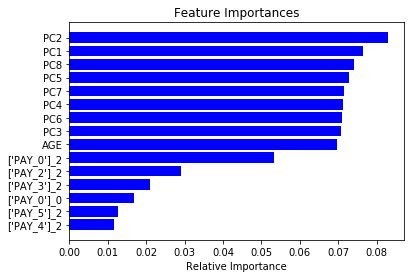

one of the most important features is PC1
one of the most important features is PC2
one of the most important features is PC3
one of the most important features is PC4
one of the most important features is PC5
one of the most important features is PC6
one of the most important features is PC7
one of the most important features is PC8
one of the most important features is AGE
one of the most important features is ['SEX']_1
one of the most important features is ['SEX']_2
one of the most important features is ['EDUCATION']_1
one of the most important features is ['EDUCATION']_2
one of the most important features is ['EDUCATION']_3
one of the most important features is ['MARRIAGE']_1
one of the most important features is ['MARRIAGE']_2
one of the most important features is ['PAY_0']_-1
one of the most important features is ['PAY_0']_0
one of the most important features is ['PAY_0']_1
one of the most important features is ['PAY_0']_2
one of the most important features is ['PAY_2']_-1
one of

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


the accuracy of the Random Forest model with all features is 0.8083333333333333.
the accuracy of the Random Forest model with only the top 4 most important features is 0.79875.


array([[-0.5236796 , -0.77175207,  0.0875268 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.17083178, -0.73829708,  0.16316094, ...,  0.        ,
         1.        ,  0.        ],
       [-0.91993812,  0.7282532 , -0.04200703, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.27959291,  0.03584431, -0.54390473, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.883649  ,  2.43208285,  2.24382251, ...,  1.        ,
         0.        ,  0.        ],
       [-0.53914185, -0.75214432,  0.16135837, ...,  0.        ,
         1.        ,  0.        ]])

In [115]:
#Dimensionality reduction for Random Forest
features = cols
importances = model_RF.feature_importances_
indices = np.argsort(importances)[-15:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

from sklearn.feature_selection import SelectFromModel
# Creating a selector object that will use the random forest classifier to identify
# features that have an importance greater than 0.06
sfm = SelectFromModel(model_RF, threshold=0.005)

# Training the selector
sfm.fit(X_train, y_train)

# Displaying the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(f'one of the most important features is {cols[feature_list_index]}')

# Transforming both the training & validation data to create a new dataset containing only the most important features
X_important_train = sfm.transform(X_train)
X_important_val = sfm.transform(X_val)
X_important_test = sfm.transform(X_test)


# Creating a new random forest classifier for the most important features only
model_RF_important = RandomForestClassifier(random_state=RSEED)

# Training the new classifier on the new dataset containing the most important features only
model_RF_important.fit(X_important_train, y_train)

# Apply The Full Featured Classifier To The Test Data
y_pred = model_RF.predict(X_val)

#Accuracy of model prior to any feature selection (all features) 
a1=accuracy_score(y_val, y_pred)
print(f'the accuracy of the Random Forest model with all features is {a1}.')

# Apply important features classifier to the testing data
y_important_pred = model_RF_important.predict(X_important_val)

# Accuracy of model with feature selection
a2=accuracy_score(y_val, y_important_pred)
print(f'the accuracy of the Random Forest model with only the top 4 most important features is {a2}.')
X_important_test

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


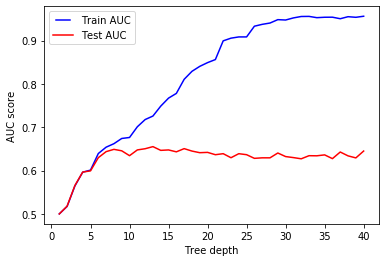

The optimum maximum depth of the tree is 13.0.


In [116]:
## RANDOM FOREST CLASSIFIER ##

import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#Hyperparamter optimization of max_depth
max_depths = np.linspace(1, 40, 40, endpoint=True)
train_results_rf = []
validation_results_rf = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results_rf.append(roc_auc)
    y_pred = rf.predict(X_val)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    validation_results_rf.append(roc_auc)

#plotting the AUC curves
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results_rf, 'b', label="Train AUC")
line2, = plt.plot(max_depths, validation_results_rf, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

#Displaying the optimumm max_depth value for the classifier
max_y2=max(validation_results_rf)
max_x2=max_depths[validation_results_rf.index(max_y2)]
print(f'The optimum maximum depth of the tree is {max_x2}.')

In [117]:
## RANDOM FOREST CLASSIFIER ##
#Random Forest with both optimum max_depth & important features 
model_RF_final = RandomForestClassifier(random_state=RSEED, max_depth=max_x2)

#fitting the final classifier
model_RF_final.fit(X_important_train, y_train)
y_final_pred1 = model_RF_final.predict(X_important_test)
y_final_pred2 = model_RF_final.predict(X_important_train)

#accuracy scores on the training & testing subsets
a3=accuracy_score(y_test, y_final_pred1)
a4=accuracy_score(y_train, y_final_pred2)

print(f'The accuracy score of the RandomForest model on the testing data with a maximum depth of {model_RF_final.max_depth} is {a3}.')
print(f'The accuracy score of the RandomForest model on the training data with a maximum depth of {model_RF_final.max_depth} is {a4}.')

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy score of the RandomForest model on the testing data with a maximum depth of 13.0 is 0.824.
The accuracy score of the RandomForest model on the training data with a maximum depth of 13.0 is 0.88453125.


# Neural Network Section

In [1]:
# This section is importing all libraries & data used for the project

# importing all necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
# importing the training and testing data file
train = pd.read_csv("./DataFiles/CreditCard_train.csv", header=1, index_col='ID')
test = pd.read_csv("./DataFiles/CreditCard_test.csv", header=1, index_col='ID')

# From our training data, we want to split a validation set
train, val = train_test_split(train, test_size=0.1)

print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

train

21600 train examples
2400 validation examples
6000 test examples


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
11652,130000,2,1,2,30,1,-2,-2,-2,-2,...,-915,-915,-1070,0,0,0,0,0,0,0
12289,30000,1,2,2,35,0,0,2,2,-2,...,0,0,0,3026,0,0,0,0,0,0
9793,150000,2,2,1,28,0,0,0,0,0,...,70371,72257,72536,5008,5000,2499,3000,2789,2439,0
8526,150000,2,2,1,36,1,2,2,4,3,...,139097,138592,141447,9734,14500,0,2000,5300,5000,0
4644,500000,2,1,1,37,0,0,0,0,0,...,287998,298343,308378,10000,15000,15000,15000,15000,15200,0
20720,50000,1,3,2,34,0,0,0,0,0,...,25556,24389,25436,4500,4000,3000,2500,4000,2500,0
2054,140000,1,3,1,37,2,2,2,2,2,...,136438,144979,139314,6400,5000,0,10800,0,5300,0
11666,200000,2,2,2,34,-1,-1,0,-1,-1,...,28300,13227,11202,13805,6797,28314,13291,11258,11912,1
11761,140000,1,1,1,27,1,-2,-2,-2,-2,...,-488,-488,-488,0,0,0,0,0,0,0


In [3]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('default payment next month') #Our target
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe),labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [4]:
batch_size = 5 
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)

### Let's illustrate the data we feed in through tensorflow dataset

In [5]:
for feature_batch, label_batch in train_ds.take(1):
    print('Every feature:', list(feature_batch.keys()))
    print('A batch of ages:', feature_batch['AGE'])
    print('A batch of targets:', label_batch )

Every feature: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
A batch of ages: tf.Tensor([41 33 29 33 36], shape=(5,), dtype=int32)
A batch of targets: tf.Tensor([0 0 0 0 0], shape=(5,), dtype=int32)


### Next step is to select the features with corresponding data type

In [6]:
feature_columns = []

# Numeric columns
numerics = [
    'LIMIT_BAL', 
    'AGE',
    'BILL_AMT1', 
    'BILL_AMT2', 
    'BILL_AMT3', 
    'BILL_AMT4', 
    'BILL_AMT5', 
    'BILL_AMT6', 
    'PAY_AMT1', 
    'PAY_AMT2', 
    'PAY_AMT3', 
    'PAY_AMT4', 
    'PAY_AMT5', 
    'PAY_AMT6'
]
for header in numerics:
    feature_columns.append(tf.feature_column.numeric_column(header))

# Categorical columns
categoricals = [
    'SEX', 
    'EDUCATION', 
    'MARRIAGE', 
    'PAY_0', 
    'PAY_2', 
    'PAY_3', 
    'PAY_4', 
    'PAY_5', 
    'PAY_6'
]

# Since the categorical variables take so many levles, we need to use embedding 
# to reduce the dimensionality

dimension = [
    2,
    3,
    3,
    15,
    15,
    15,
    15,
    15,
    15
]
i = 0
for header in categoricals:
    category = tf.feature_column.categorical_column_with_identity(
        header, len(train[header].unique()), default_value=0
    )
    category_one_hot = tf.feature_column.indicator_column(category)
    feature_columns.append(category_one_hot)
    
#     Now let's add the emedding layer
    category_embedding = tf.feature_column.embedding_column(category, dimension=dimension[i])
    feature_columns.append(category_embedding)
    i += 1

In [7]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [8]:
batch_size = 64
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [9]:
model = tf.keras.Sequential([
    feature_layer,
    tf.keras.layers.Dense(64, activation='softmax'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, clipnorm=1.)
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

model.fit(train_ds, validation_data=val_ds, epochs=3)


Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Epoch 1/3
338/338 [==============================] - 27s 80ms/step - loss: 0.5388 - accuracy: 0.7661 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/3
338/338 [==============================] - 29s 85ms/step - loss: 0.5304 - accuracy: 0.7773 - val_loss: 0.5453 - val_accuracy: 0.7667
Epoch 3/3
338/338 [==============================] - 28s 82ms/step - loss: 0.5307 - accuracy: 0.7773 - val_loss: 0.5447 - val_accuracy: 0.7667


In [10]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

94/94 [==============================] - 7s 73ms/step - loss: 0.5159 - accuracy: 0.7890
Accuracy 0.789


### Now let's try to improve the model
3 different adjustment will be made:
1. 'AGE' will be transformed into bucket variable, since it makes more sense to treat them like people of different age group.
2. Try to standardize the numeric variables.
3. Do a PCA to the numerics and see if we can trhow away some variables.

In [11]:
# Firstly, 'AGE' as bucket input

feature_columns = []

age = tf.feature_column.numeric_column("AGE")

age_buckets = tf.feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
feature_columns.append(age_buckets)

In [12]:
# Numeric columns to be standardised
raw_numerics = [
    'AGE',
    'LIMIT_BAL', 
    'BILL_AMT1', 
    'BILL_AMT2', 
    'BILL_AMT3', 
    'BILL_AMT4', 
    'BILL_AMT5', 
    'BILL_AMT6', 
    'PAY_AMT1', 
    'PAY_AMT2', 
    'PAY_AMT3', 
    'PAY_AMT4', 
    'PAY_AMT5', 
    'PAY_AMT6'
]

# 9 principal components are kept after PCA
principalColumns = [
    'PC1',
    'PC2',
    'PC3',
    'PC4',
    'PC5',
    'PC6',
    'PC7',
    'PC8', 
    'PC9',
]

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(0.95)

# Firstly we fit only the train data
scaler.fit(train.loc[:, raw_numerics])

# Then we apply the transformation to all the datasets
train_img = scaler.transform(train.loc[:, raw_numerics])
test_img = scaler.transform(test.loc[:, raw_numerics])
val_img = scaler.transform(val.loc[:, raw_numerics])

pca.fit(train_img)


train_img = pca.transform(train_img)
test_img = pca.transform(test_img)
val_img = pca.transform(val_img)

principalTrain = pd.DataFrame(data=train_img,
                             columns=principalColumns,
                             index=train.index)
principalTest = pd.DataFrame(data=test_img,
                            columns=principalColumns,
                            index=test.index)
principalVal = pd.DataFrame(data=val_img,
                           columns=principalColumns,
                           index=val.index)


train = pd.concat([principalTrain, train], axis=1)
test = pd.concat([principalTest, test], axis=1)
val = pd.concat([principalVal, val], axis=1)

for header in principalColumns:
    feature_columns.append(tf.feature_column.numeric_column(header))
    
# Categorical columns
categoricals = [
    'SEX', 
    'EDUCATION', 
    'MARRIAGE', 
    'PAY_0', 
    'PAY_2', 
    'PAY_3', 
    'PAY_4', 
    'PAY_5', 
    'PAY_6'
]

# Since the categorical variables take so many levles, we need to use embedding 
# to reduce the dimensionality

dimension = [
    4,
    10,
    6,
    15,
    15,
    15,
    15,
    15,
    15
]
i = 0
for header in categoricals:
    category = tf.feature_column.categorical_column_with_identity(
        header, len(train[header].unique()), default_value=0
    )
    category_one_hot = tf.feature_column.indicator_column(category)
    feature_columns.append(category_one_hot)
    
#     Now let's add the emedding layer
    category_embedding = tf.feature_column.embedding_column(category, dimension=dimension[i])
    feature_columns.append(category_embedding)
    i += 1

In [13]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [14]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [15]:
model = tf.keras.Sequential([
    feature_layer,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='softmax'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True)
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5
675/675 [==============================] - 63s 93ms/step - loss: 0.4609 - accuracy: 0.8058 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
675/675 [==============================] - 69s 103ms/step - loss: 0.4379 - accuracy: 0.8192 - val_loss: 0.4628 - val_accuracy: 0.8017
Epoch 3/5
675/675 [==============================] - 66s 98ms/step - loss: 0.4342 - accuracy: 0.8202 - val_loss: 0.4620 - val_accuracy: 0.8017
Epoch 4/5
675/675 [==============================] - 70s 103ms/step - loss: 0.4328 - accuracy: 0.8205 - val_loss: 0.4599 - val_accuracy: 0.8029
Epoch 5/5
675/675 [==============================] - 60s 89ms/step - loss: 0.4298 - accuracy: 0.8217 - val_loss: 0.4631 - val_accuracy: 0.7983


In [16]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

188/188 [==============================] - 10s 54ms/step - loss: 0.4139 - accuracy: 0.8325
Accuracy 0.8325


# LDA Section

In [3]:
#import the data from the csv file
data = pd.read_csv("./DataFiles/CreditCard_train.csv")
test = pd.read_csv("./DataFiles/CreditCard_test.csv")

feature_names = np.array(data.iloc[0])
feature_names = feature_names[1:-1]

data = data.drop(index = [0], columns = ["Unnamed: 0"]).reset_index(drop = True)
data.dropna(inplace = True)

#removing the first column
X = data.iloc[:,:-1].copy()
#removing the last column
y = data.iloc[:, -1].copy()

#array containing all the columns with category data type
cat_list = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']
for col in cat_list:
    X[col] = X[col].astype('category')
    X = pd.concat((X, pd.get_dummies(X[col], prefix=[col])), axis=1)

# drop the original category columns
X.drop(columns = cat_list, inplace = True)

print(X.head())
print(X.shape)

y.describe()

       X1  X5    X12    X13    X14    X15    X16    X17   X18    X19  ...  \
0   20000  24   3913   3102    689      0      0      0     0    689  ...   
1  120000  26   2682   1725   2682   3272   3455   3261     0   1000  ...   
2   90000  34  29239  14027  13559  14331  14948  15549  1518   1500  ...   
3   50000  37  46990  48233  49291  28314  28959  29547  2000   2019  ...   
4   50000  57   8617   5670  35835  20940  19146  19131  2000  36681  ...   

  ['X11']_-1 ['X11']_-2 ['X11']_0 ['X11']_2  ['X11']_3  ['X11']_4  ['X11']_5  \
0          0          1         0         0          0          0          0   
1          0          0         0         1          0          0          0   
2          0          0         1         0          0          0          0   
3          0          0         1         0          0          0          0   
4          0          0         1         0          0          0          0   

   ['X11']_6  ['X11']_7  ['X11']_8  
0          0       

count     24000
unique        2
top           0
freq      18630
Name: Y, dtype: object

In [4]:
#Importing all the used sklearn libraries used in the model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score

In [5]:
# set up train/test split
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [6]:
#creating an array for all columns regarding bills
bill = ['X12', 'X13', 'X14', 'X15', 'X16', 'X17']
#creating an array for all columns regarding payments
pay = ['X18', 'X19', 'X20', 'X21', 'X22', 'X23']
cols_to_scale = ['X1'] + bill + pay #combining the two arrays & the first column
print(cols_to_scale)

['X1', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


In [7]:
#insertion of the Pipeline function. 
#the steps taken can be used to cross-validate data while using different parameters found in Gridsearch
ss_pipe = Pipeline([('scaler', StandardScaler())])
ss_transformer = [('ss', ss_pipe, cols_to_scale)]
ss_ct = ColumnTransformer(transformers = ss_transformer, remainder = 'passthrough')

In [8]:
#introduction the roc diagram
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# The Pipelines used

In [9]:
# Lets combine all the testing into one.  

#PCA with Logistic Regression
pipe_pca_lr = Pipeline([
                ('preprocess_ss', ss_ct),
                ('dim_reduction', PCA()),
                ('logistic', LogisticRegression(solver='lbfgs', max_iter=500))
                ])

#sKBest with Logistic Regression
pipe_skb_lr = Pipeline([
                ('preprocess_ss', ss_ct),
                ('dim_reduction', SelectKBest(score_func=f_classif)),
                ('logistic', LogisticRegression(solver='lbfgs', max_iter=500))
                ])

#PCA with LDA
pipe_pca_lda = Pipeline([
                ('preprocess_ss', ss_ct),
                ('dim_reduction', PCA()),
                ('classification',LDA(solver='eigen', shrinkage='auto'))
                ])

#sKBest with LDA
pipe_skb_lda = Pipeline([
                ('preprocess_ss', ss_ct),
                ('dim_reduction', SelectKBest(score_func=f_classif)),
                ('classification',LDA(solver='eigen', shrinkage='auto'))
                ])

# The parameters list for the Gridsearch

In [10]:
#set up testing grid
num_comp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
num_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
C_to_test = [0.1, 1, 10]

params_pca_lr = [{'dim_reduction':[PCA()],
              'dim_reduction__n_components':num_comp,
              'logistic__C':C_to_test
              }]

params_skb_lr = [{'dim_reduction':[SelectKBest(score_func = f_classif)],
              'dim_reduction__k':num_features,
              'logistic__C':C_to_test
              }]

params_pca_lda = [{'dim_reduction':[PCA()],
                   'dim_reduction__n_components':num_comp,
                  }]

params_skb_lda = [{'dim_reduction':[SelectKBest(score_func = f_classif)],
                   'dim_reduction__k':num_features,
                  }]

# Gridsearch for the LDA & Logistic Regression models

In [11]:
#Gridsearch containing Logistic Regression
gs_pca = GridSearchCV(pipe_pca_lr, params_pca_lr, verbose = 1).fit(X_train, y_train)


print("Final score is {:.2f}".format(gs_pca.score(X_test, y_test) * 100), "%")
print("Best model config for pca", gs_pca.best_params_)
print()

gs_skb = GridSearchCV(pipe_skb_lr, params_skb_lr, verbose = 1).fit(X_train, y_train)

print("Final score is {:.2f}".format(gs_skb.score(X_test, y_test) * 100), "%")
print("Best model config for skb", gs_skb.best_params_)
print()

Fitting 3 folds for each of 63 candidates, totalling 189 fits


/Users/henrivanhove/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 189 out of 189 | elapsed:   42.6s finished


Final score is 80.59 %
Best model config for pca {'dim_reduction': PCA(copy=True, iterated_power='auto', n_components=22, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'dim_reduction__n_components': 22, 'logistic__C': 10}

Fitting 3 folds for each of 63 candidates, totalling 189 fits


/Users/henrivanhove/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/henrivanhove/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [48 63 70 80] are constant.
  UserWarning)
/Users/henrivanhove/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/henrivanhove/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [78] are constant.
  UserWarning)
/Users/henrivanhove/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: Runti

Final score is 81.64 %
Best model config for skb {'dim_reduction': SelectKBest(k=20, score_func=<function f_classif at 0x1a25e1a598>), 'dim_reduction__k': 20, 'logistic__C': 1}



In [12]:
#Gridsearch containing LDA
gs_pca_lda = GridSearchCV(pipe_pca_lda, params_pca_lda, verbose = 1).fit(X_train, y_train)

print("Final score is {:.2f}".format(gs_pca_lda.score(X_test, y_test) * 100), "%")
print("Best model config for pca_lda", gs_pca_lda.best_params_)
print()

gs_skb_lda = GridSearchCV(pipe_skb_lda, params_skb_lda, verbose = 1).fit(X_train, y_train)

print("Final score is {:.2f}".format(gs_skb_lda.score(X_test, y_test) * 100), "%")
print("Best model config for skb_lda", gs_skb_lda.best_params_)
print()

Fitting 3 folds for each of 21 candidates, totalling 63 fits


/Users/henrivanhove/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:   15.5s finished


Final score is 80.39 %
Best model config for pca_lda {'dim_reduction': PCA(copy=True, iterated_power='auto', n_components=22, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'dim_reduction__n_components': 22}

Fitting 3 folds for each of 21 candidates, totalling 63 fits


/Users/henrivanhove/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/henrivanhove/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [48 63 70 80] are constant.
  UserWarning)
/Users/henrivanhove/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/henrivanhove/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [78] are constant.
  UserWarning)
/Users/henrivanhove/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: Runti

Final score is 81.62 %
Best model config for skb_lda {'dim_reduction': SelectKBest(k=22, score_func=<function f_classif at 0x1a25e1a598>), 'dim_reduction__k': 22}



In [13]:
y_true = y_test.values.astype(int)

AUC: 0.75


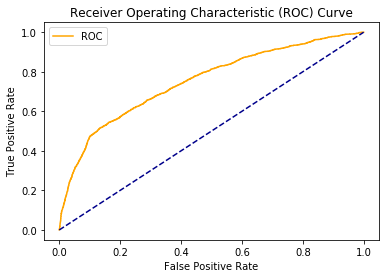

In [15]:
#ROC curves 
curve1 = gs_pca_lda.predict(X_test)
curve1_prob = gs_pca_lda.predict_proba(X_test)[:, -1]

auc = roc_auc_score(y_true, curve1_prob)
print('AUC: %.2f' % auc)
fpr, tpr, _ = roc_curve(y_true, curve1_prob, pos_label = 1)
plot_roc_curve(fpr, tpr)